### Motivation behind Building a Movie Recommendation System

Building a movie recommendation system can provide several benefits, both for businesses and users. Here are some reasons why building a movie recommendation system is valuable:

* Enhanced User Experience: Recommendation systems enhance user experience by providing personalized content suggestions. Users are more likely to engage with a platform that understands their preferences and recommends relevant movies.
* Increased User Engagement: Recommending movies tailored to individual preferences can increase user engagement and retention. Users are more likely to spend more time on a platform that offers content they find interesting.
* Content Discovery: Movie recommendation systems help users discover new content they might not have found otherwise. This is particularly beneficial in platforms with extensive libraries where users might be overwhelmed by choices.
* Business Revenue: For streaming platforms or movie rental services, a good recommendation system can lead to increased revenue. When users discover and watch more content, it can result in higher subscription rates or additional rental fees.
* Competitive Advantage: A well-designed recommendation system can provide a competitive advantage in the entertainment industry. Users are drawn to platforms that offer a personalized and enjoyable experience.
* Customer Satisfaction: By providing personalized recommendations, platforms can improve overall customer satisfaction. Users appreciate services that cater to their individual preferences and interests.
* Data Utilization: Building a recommendation system involves analyzing user behavior and preferences. This data can be valuable for understanding customer behavior, improving content offerings, and making data-driven business decisions.

### Explanation

* Around 844 Movies don't have a tagline, so its better to not include it in the analysis. There seems to be a few features that could be helpful in determining the similarity between the movies and hence in recommendation. The features that look promising are 'genres', 'keywords','popularity', 'revenue', 'vote_average'. 'Original_Language' could have been included one-hot encoded had the number of language categories been smaller, but there are way too many languages to consider that possibility.  
* 'Genres' and 'Keywords' tells in about the characteristics of a particular movie which could play a major role in drawing similarity between two movies. These two features store textual information and hence they are first converted into a single string (since TFIDFVectorizer/ CountVectorizer takes data into a single string format and treat each row as a single document) and transforms them into vectors. Maximum 2000 features are considered and hence there will be 2000 rows.
* The other features, namely 'popularity', 'revenue', 'vote_average' contain numerical values. A new dataframe containing values of these features are created. The features are then scaled using the MinMaxScaler so that larger values do not impact the accuracy. This dataframe is concatenated with the transformed vector. 
* Cosine similarity is computed between each pair of vectors. The resultant scores are arranged in descending order and top 5 movies leaving the first one (first one is the cosine similarity score of the movie wth itself) are recommended to a particular user.


### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Load the Dataset

In [5]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
df.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [10]:
df['original_language'].nunique()

37

In [11]:
df.iloc[0]['production_companies']  #Check what's stored in the feature 'production_companies'.

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [12]:
df.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [13]:
df.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [14]:
df_temp = pd.DataFrame(df[['popularity', 'revenue','vote_average']], columns = ['popularity', 'revenue','vote_average'], index= df.index)

In [15]:
scale = MinMaxScaler()
df_temp = scale.fit_transform(df_temp)

In [16]:
df_temp 

array([[1.71814515e-01, 1.00000000e+00, 7.20000000e-01],
       [1.58846031e-01, 3.44695852e-01, 6.90000000e-01],
       [1.22634857e-01, 3.15884375e-01, 6.30000000e-01],
       ...,
       [1.64973372e-03, 0.00000000e+00, 7.00000000e-01],
       [9.78787458e-04, 0.00000000e+00, 5.70000000e-01],
       [2.20411627e-03, 0.00000000e+00, 6.30000000e-01]])

In [17]:
def convert_into_strings(row):
    genre_item = json.loads(row['genres'])
    keywords_item = json.loads(row['keywords'])
    
    lis_genre=[]
    lis_keywords=[]
    for item in genre_item:
        lis_genre.append(''.join(item['name'].split()))
    for item in keywords_item:
        lis_keywords.append(''.join(item['name'].split()))
    
        
    string_genre = ' '.join(lis_genre)
    string_keywords = ' '.join(lis_keywords)
    
    return '%s %s' % (string_genre, string_keywords)

In [18]:
df['string']= df.apply(convert_into_strings, axis=1)

In [19]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...


In [20]:
df.iloc[0]['string']       #Check what is stored in the 'string' column which was formaed by concatenating genre and keywords

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [21]:
df_label = df['title']

In [22]:
movie2idx = pd.Series(df.index, index=df['title'])  

movie2idx is a pandas series which stores the movie 'title' as index and the indices of the dataframe as its data. So we can now easily access the index for a particular movie.

In [23]:
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [24]:
movie2idx['John Carter']

4

### TFIDFVectorizer

In [25]:
# Create an instance of tfidfVectorizer and transform the string into vectors

tfidf = TfidfVectorizer(max_features=2000)
vector = tfidf.fit_transform(df['string'])

In [26]:
# The matrix containing the vectors is sparse. There are a total 2000 columns since we confined the maximum features to be 2000.

vector

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [27]:
# To see the content of a matrix, we need to convert it into array.

vec2arr = vector.toarray()

In [28]:
# Concatenate the numerical features array and vectors array to form a final array.

final_array = np.concatenate((vec2arr,df_temp), axis=1)

In [29]:
# Lets check the shape (The number of columns now is 2003 since 3 new features have been concatenated)

final_array.shape

(4803, 2003)

In [30]:
# Lets first take one movie and see the recommendation based on the similarity.

idx = movie2idx['Scream 3']     #idx stores the index of the movie 'Scream 3'

In [31]:
idx

1164

In [32]:
# Access the independent features values for that particular row

query = final_array[idx]

In [33]:
query.shape

(2003,)

In [34]:
# It is reshaped to consist of 1 row and as many columns as required

query = query.reshape(1,-1)

### Cosine Similarity

In [35]:
# Cosine similarity between the vector containing information about the movie 'Scream 3' and the other movies is computed.

cos_similarity = cosine_similarity(query, final_array)

In [36]:
cos_similarity.shape

(1, 4803)

In [37]:
# Convert the cosine similarity scores into a 1-D array.

cos_score = cos_similarity.flatten()

In [38]:
cos_score.shape

(4803,)

### Plot Cosine Similarity Score

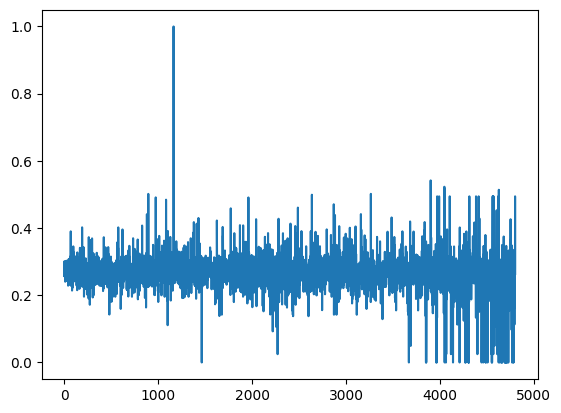

In [39]:
plt.plot(cos_score)

The long spike with cosine similarity score=1 is the similarity computed between the 'Scream 3' movie vector with itself.

In [40]:
# Sort the Cosine similarity scores in the descending order and store the indices in the variable 'ranks'.

ranks = (-cos_score).argsort()

In [41]:
ranks

array([1164, 3902, 4048, ..., 4721, 4305, 4553], dtype=int64)

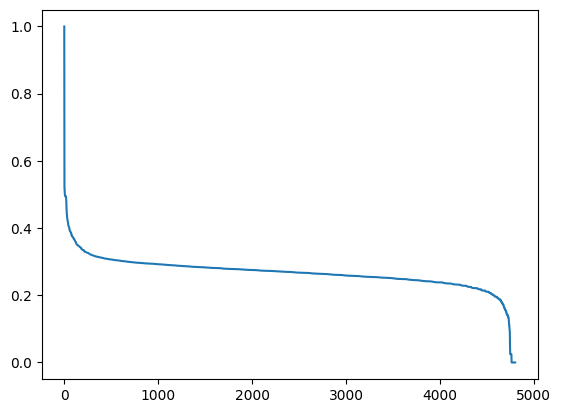

In [42]:
plt.plot(cos_score[ranks])

### Movies Recommended

In [43]:
# Recommend the top 5 movies 

movie2idx.iloc[ranks[1:6]]

title
Friday the 13th Part VI: Jason Lives    3902
The Calling                             4048
Friday the 13th: A New Beginning        4053
Graduation Day                          4628
Shadow of the Vampire                   3265
dtype: int64

In [44]:


def recommend_movies(movie):
    
    movie_idx = movie2idx[movie]
    if type(movie_idx) == pd.Series :
        movie_idx = movie_idx.iloc[0]
    
    query = final_array[movie_idx]
    query = query.reshape(1,-1)
    cos_score = cosine_similarity(query, final_array)
    cos_score = cos_score.flatten()
    ranks = (-cos_score).argsort()[1:6]
    
    return df['title'].iloc[ranks]
       

In [45]:
print(recommend_movies('Scream 3'))

3902    Friday the 13th Part VI: Jason Lives
4048                             The Calling
4053        Friday the 13th: A New Beginning
4628                          Graduation Day
3265                   Shadow of the Vampire
Name: title, dtype: object


In [46]:
print(recommend_movies('Mortal Kombat'))

1611                        Mortal Kombat: Annihilation
1670                                 DOA: Dead or Alive
4105    The Book of Mormon Movie, Volume 1: The Journey
4385                              Lisa Picard Is Famous
4801                                   Shanghai Calling
Name: title, dtype: object
